## importing the essentials

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\A C E
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [23]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [24]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df.shape

(5572, 5)

## Data Cleaning

In [26]:
print(df.duplicated().sum())
print(df.isnull().sum())
print(df.info())

403
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [27]:
df.rename(columns={'v1':'target','v2':'texts' }, inplace=True)
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [28]:
encod = LabelEncoder()
df['target'] =  encod.fit_transform(df['target'])

In [29]:
df = df.drop_duplicates(keep='first')

## creating the new feature to get more insights

In [ ]:
df['text_char'] = df['texts'].apply(len)
df['word_num'] = df['texts'].apply(lambda x : len(nltk.word_tokenize(x)))
df['sent_num'] = df['texts'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,texts,text_char,word_num,sent_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## EDA

<Axes: ylabel='count'>

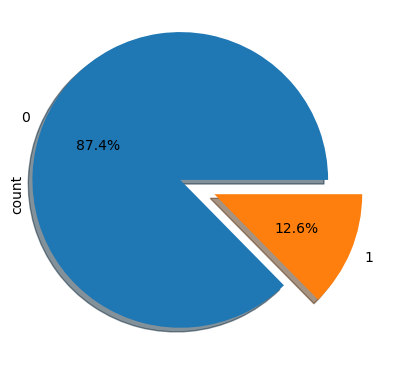

In [43]:
df['target'].value_counts().plot.pie(autopct = "%1.1f%%", explode = [0.25, 0], shadow = True)

the data is highly biased